# 필수 라이브러리 로딩

In [22]:
# 필수 라이브러리
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from IPython.display import Image

%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

# 한글 폰트 설정
mpl.rc('font', family='D2Coding')
# 유니코드에서 음수 부호 설정
mpl.rc('axes', unicode_minus = False)

warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
plt.rc('figure', figsize=(10,8))

# 2018년도 국내 프로야구 선수 연봉 예측
- 출처 : http://www.statiz.co.kr

## 데이터 불러오기

In [4]:
pitcher = pd.read_csv('C:/K_digital/source/data/picher_stats_2017.csv')
batter = pd.read_csv('C:/K_digital/source/data/batter_stats_2017.csv')

In [5]:
pitcher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [6]:
batter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       191 non-null    object 
 1   팀명        191 non-null    object 
 2   경기        191 non-null    int64  
 3   타석        191 non-null    int64  
 4   타수        191 non-null    int64  
 5   안타        191 non-null    int64  
 6   홈런        191 non-null    int64  
 7   득점        191 non-null    int64  
 8   타점        191 non-null    int64  
 9   볼넷        191 non-null    int64  
 10  삼진        191 non-null    int64  
 11  도루        191 non-null    int64  
 12  BABIP     191 non-null    object 
 13  타율        191 non-null    float64
 14  출루율       191 non-null    float64
 15  장타율       191 non-null    float64
 16  OPS       191 non-null    float64
 17  wOBA      191 non-null    float64
 18  WAR       191 non-null    float64
 19  연봉(2018)  191 non-null    int64  
 20  연봉(2017)  191 non-null    int64 

In [7]:
pitcher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [8]:
pitcher.shape

(152, 22)

In [9]:
pitcher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

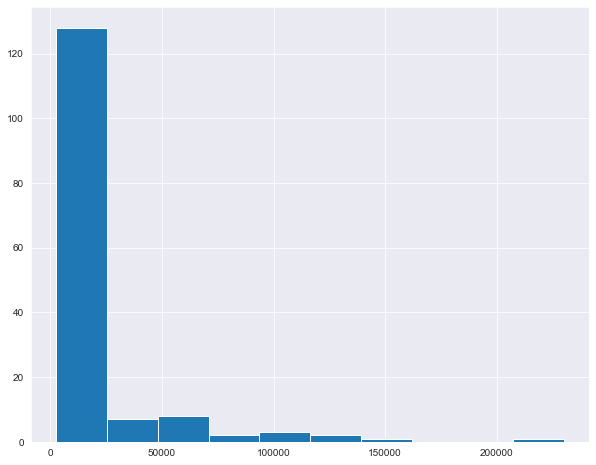

In [17]:
pitcher['연봉(2018)'].hist()
plt.show()

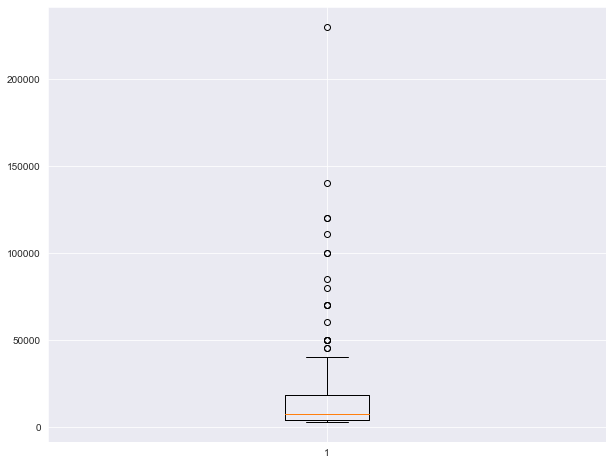

In [16]:
plt.boxplot(pitcher['연봉(2018)'])
plt.show()

## 회귀 분석에 사용할 피처 탐색

In [18]:
pitcher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [19]:
pitcher_df = pitcher.drop(['선수명', '팀명'], axis=1)
len(pitcher_df.columns)

20

In [24]:
# 각 feature에 대한 분포를 시각화하는 작업

def plot_hist(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    
    plt.show()

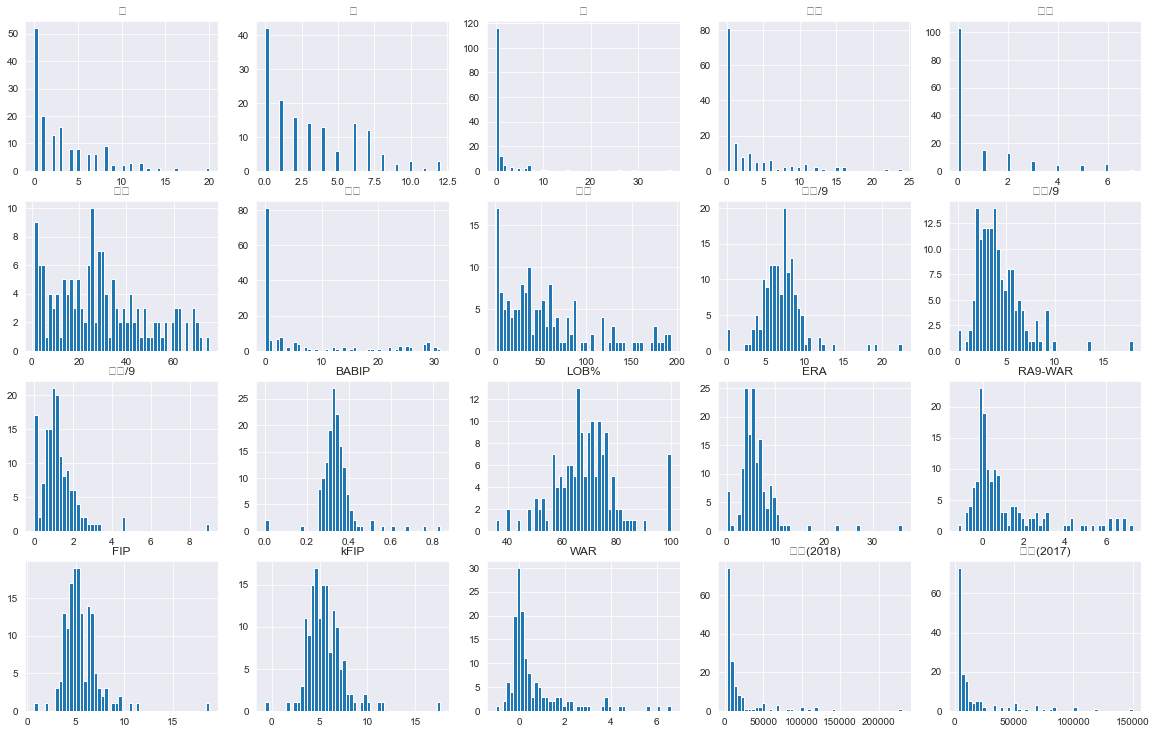

In [25]:
plot_hist(pitcher_df)

## 전처리 : 피처 스케일링

- 피처 스케일링 : 피처들간의 간위를 맞추는 작업
- StandardScaler : 표준화(평균 = 0, 표준편차 = 1)
- 0에서 1 사이의 값으로 단위를 맞추는 작업

In [26]:
def standard_scaling(df, scale_columns):
    
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x : (x-series_mean)/series_std)
    return df

In [27]:
pitcher_df.columns

Index(['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

In [29]:
# 회귀분석 : 독립변수와 종속변수를 분리하는 작업
# 종속변수 : 연봉(2018)
# 독립변슈를 사용할 feature들을 리스트로 저장
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
pitcher_df = standard_scaling(pitcher, scale_columns)

In [30]:
pitcher_df = pitcher_df.rename(columns = {'연봉(2018)':'y'})
pitcher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


### 피처 스케일링 : 더미 or 원-핫 인코딩

- 문자 또는 범주형 데이터를 정형화된 데이터(0과 1)로 변형하는 작업

In [32]:
team_encoding = pd.get_dummies(pitcher_df['팀명'])
# 기존에 팀명 컬럼 삭제
pitcher_df = pitcher_df.drop('팀명', axis = 1)
pitcher_df = pitcher_df.join(team_encoding)

In [33]:
team_encoding.head()

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [34]:
pitcher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# MAE, RMSE
def evaluate_rger(y, pred):
    # MAE
    mae = mean_absolute_error(y, pred)
    # RMSE
    rmse = np.sqrt(mean_squared_error(y, pred))
    
    print(f'MAE: {mae:.3f}, RMSE : {rmse:.3f}')

## 선형 회귀

### 기본 예측/평가

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = pitcher_df[pitcher_df.columns.difference(['선수명', 'y'])]
y = pitcher_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

# 평가함수 호출
evaluate_rger(y_test, pred)

MAE: 6208.836, RMSE : 8476.013


In [39]:
import statsmodels.api as sm

# 상수항
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit
model.summary()

AttributeError: 'function' object has no attribute 'summary'

## 피처들의 영향력을 파악하기 위한 시각화  - summary의 params

In [ ]:
# 회귀계수를 리스트로 변환하는 작업
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명(index)를 리스트로 변환하는 작업
x_labels = model.params.index.tolist()

ax = coefs_series.plot(kind = 'bar')
ax.set_titles('컬럼들의 상관계수 : 영향력있는 컬럼 추출')
ax.set_xlabel('features')
ax.set_ylabel('coef')
ax.set_xticklabel(x_labels)
plt.show()

## 예측값, 실제값 데이터 분석

In [40]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # 예측값, 실제값 데이터 프레임 생성
    result_df = pd.DataFrame(y_test.values, columns=['real_y'])
    result_df['pred_y'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_y'] - result_df['pred_y'])
    
    # 예측값과 실제값의 차이가 큰 데이터 순서대로 추출
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test, pred, n_tops = 10)

    real_y    pred_y     diff
10   35000   11950.0  23050.0
26   29000   46325.0  17325.0
7   100000  116831.0  16831.0
30   16000   30373.0  14373.0
28    9000   -3244.0  12244.0
13   23000   34698.0  11698.0
9    50000   39091.0  10909.0
25    4700   -5447.0  10147.0
24   45000   34979.0  10021.0
12   15000    7892.0   7108.0


## 피처들의 상관관계를 분석하는 시각화 - Heatmap

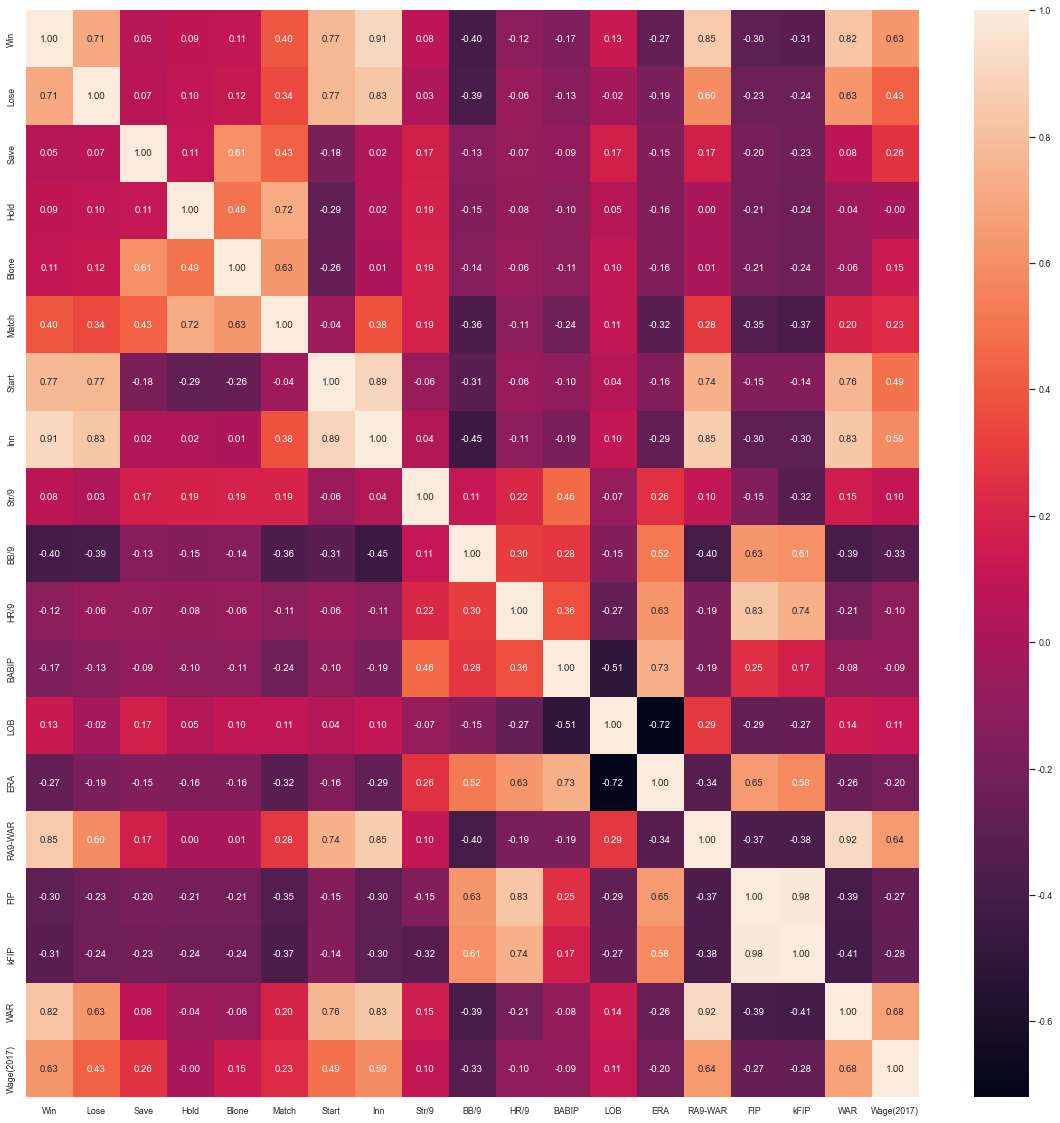

In [42]:
# 피처들의 상관계수 산출하기
corr = pitcher_df[scale_columns].corr(method='pearson')
show_cols = ['Win', 'Lose', 'Save', 'Hold', 'Blone', 'Match', 'Start', 'Inn', 'Str/9', 'BB/9', 'HR/9',
       'BABIP', 'LOB', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', 'Wage(2017)']

#히트맵
plt.figure(figsize=(20, 20))
sns.set(font_scale=0.8)
sns.heatmap(corr.values, annot=True, cbar=True, fmt='.2f', xticklabels=show_cols, yticklabels=show_cols)
plt.show()

## 회귀분석의 성능을 향상시키기 위해 다중공선성 확인

In [43]:
# 분산 팽창 요인(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 피처들의 vif 계수 확인
vif = pd.DataFrame()
vif['VIF factor'] = [variance_inflation_factor(X.values, i ) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK


## 적절한 피처를 이용하여 다시 모델 학습

In [45]:
X = pitcher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '선발', '연봉(2017)']]
y = pitcher_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# LinearRegression
lr = LinearRegression()
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)

# 평가함수 호출
evaluate_rger(y_test, pred)

MAE: 5194.151, RMSE : 7366.828


In [47]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9212109763382361
0.8772596076714894


In [48]:
vif = pd.DataFrame()
vif['VIF factor'] = [variance_inflation_factor(X.values, i ) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF factor,features
0,2.0,FIP
1,4.1,WAR
2,2.0,볼넷/9
3,1.2,삼진/9
4,2.7,선발
5,1.9,연봉(2017)


In [49]:
X = pitcher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '선발', '연봉(2017)']]
predict_2018 = model.predict(X)
pitcher_df['예측연봉(2018)'] = pd.Series(predict_2018)

## 최종 예측 결과 추출

- 선수명 실제연봉(2018) 예측연봉(2018) 작년연봉(2017)

In [50]:
# 원본 데이터 다시 로딩
pitcher = pd.read_csv('C:/K_digital/source/data/picher_stats_2017.csv')
pitcher = pitcher[['선수명', '연봉(2017)']]

# 2018년도 연봉 정보 합치기
result = pd.DataFrame()
result['선수명'] = pitcher['선수명']
result['실제연봉(2018)'] = y
result['예측연봉(2018)'] = pitcher_df['예측연봉(2018)']
result['작년연봉(2017)'] = pitcher['연봉(2017)']
result.head()

,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,켈리,140000,130806.118346,85000
1,소사,120000,94811.346360,50000
2,양현종,230000,178967.865515,150000
3,차우찬,100000,124925.403783,100000
4,레일리,111000,108855.005059,85000


In [ ]:
result_df = result[result['작년연봉(2017)'] != result_df['실제연봉(2018)']]
# 인덱스 정리
result_df = result_df.reset_index()
